(array([  2.,   4.,   7.,  13.,  25.,  44.,  49.,  75.,  89., 107., 118.,
        122., 101.,  72.,  76.,  45.,  22.,  16.,   6.,   7.]),
 array([-20.22136451, -18.30449706, -16.38762962, -14.47076218,
        -12.55389473, -10.63702729,  -8.72015984,  -6.8032924 ,
         -4.88642496,  -2.96955751,  -1.05269007,   0.86417738,
          2.78104482,   4.69791227,   6.61477971,   8.53164715,
         10.4485146 ,  12.36538204,  14.28224949,  16.19911693,
         18.11598437]),
 <BarContainer object of 20 artists>)

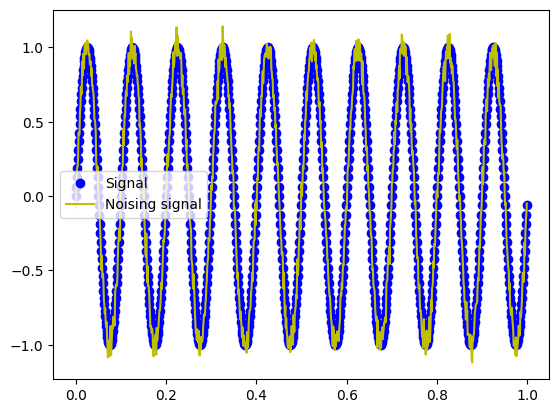

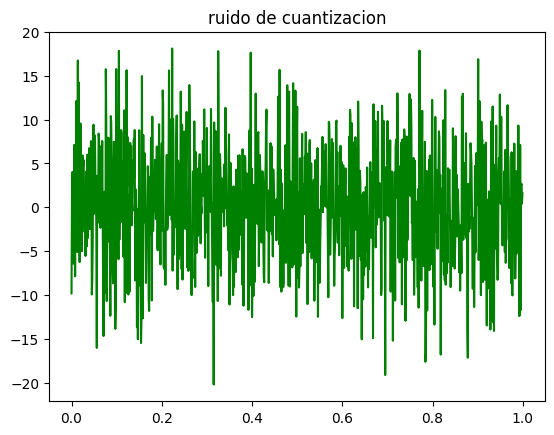

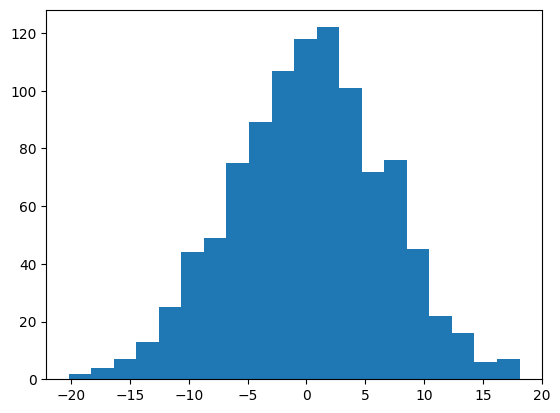

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 26 18:09:52 2022

@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""
#%%
from muestreoSenoidal import mi_funcion_sen 
import matplotlib.pyplot as plt 
import numpy as np

#%%Constantes
fadc=1000
n = 1000
N  = 1000#         cant. muestras
fs = 1000 #Hz#   frecuencia de muestreo
Vf = 1#volts
ff=10
freq_señal = 500 

Amax=1#amplitud Normalizada
ph=0
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral
kn=(1/10,1,10)# escala para la potencia del ruido de cuantización Pq=q**2/12.
#----ADC

B=(4,8,16)#Bits size que tiene la palabra
coefDeCargaADC = 0.8
#%%
# ----------------------
#Señal de ruido y Señal senoidal
[tt,signal] = mi_funcion_sen(vmax = Amax, dc = 0, ff = ff, ph=ph, nn = N, fs = fs)

ruido = np.random.normal(0,(Amax**2/20),N)
# ruido= 0
#%%
def cuantizar(xx,Vf,B):
    q = Vf/(2**(B-1)-1) #q aproximado, daba mal el grafico
    # q = 2*Vf/(2**(B)-1) ##q exacto #LSB analogico
    Valor = (xx/q) ##generamos vector cantidad de veces q
    Muestras =np.rint(Valor)           ##lo devolvemos a voltaje 
    return Muestras, q
#%%
x = coefDeCargaADC*signal

####cuantizacion The ADC
[vector,q]=cuantizar(signal,Vf,B[1])

Sr= signal+ ruido##sR = s + n #señal que entra al ADC 

nq=Sr/q-vector

Pq=(q**2)/12#     Ppotencia del ruido de cuantización
Pn = kn[1] *Pq #    Potencia de ruido con Kn=1
#%%     Ploteo

plt.close("all")
plt.clf()
plt.figure(1)
plt.plot(tt, signal, 'bo')
plt.plot(tt, Sr, 'y')
plt.legend(['Signal','Noising signal'])

# plt.plot(tt, vector, 'b')#entre -0.5 a 0.5 
plt.figure(2)

plt.plot(tt, nq, 'g')#ruido de cuantizacion
plt.title('ruido de cuantizacion')

plt.figure(3)
plt.hist(nq,20)# se ven las ocurrencias
#Queremos que sea plano

